In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Downloads\credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df=df.dropna()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
y = df['loan_status']
X= df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']]

In [7]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,22,59000,123.0,35000,16.02,0.59,3,RENT,PERSONAL,D,Y
1,21,9600,5.0,1000,11.14,0.10,2,OWN,EDUCATION,B,N
2,25,9600,1.0,5500,12.87,0.57,3,MORTGAGE,MEDICAL,C,N
3,23,65500,4.0,35000,15.23,0.53,2,RENT,MEDICAL,C,N
4,24,54400,8.0,35000,14.27,0.55,4,RENT,MEDICAL,C,Y


In [8]:
print(X.shape)
print(y.shape)

(28638, 11)
(28638,)


In [9]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=111)

In [10]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25234,28,81996,12.0,3000,12.42,0.04,5,MORTGAGE,EDUCATION,B,N
19450,32,39314,16.0,3000,15.23,0.08,7,RENT,DEBTCONSOLIDATION,C,N
16315,25,58650,4.0,20000,14.09,0.29,4,MORTGAGE,MEDICAL,D,Y
1466,23,31500,7.0,1200,8.88,0.04,2,RENT,EDUCATION,B,N
26756,30,28000,14.0,14400,12.18,0.51,5,OWN,MEDICAL,B,N


In [11]:
df["loan_grade"].value_counts()

A    9402
B    9151
C    5699
D    3248
E     870
F     209
G      59
Name: loan_grade, dtype: int64

In [42]:

loan_grade_encoder = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_train_cat_le.head()



,loan_grade
25234,2
19450,3
16315,4
1466,2
26756,2


In [43]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(21478, 11) (21478,)
(7160, 11) (7160,)


In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21478 entries, 25234 to 13781
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  21478 non-null  int64  
 1   person_income               21478 non-null  int64  
 2   person_emp_length           21478 non-null  float64
 3   loan_amnt                   21478 non-null  int64  
 4   loan_int_rate               21478 non-null  float64
 5   loan_percent_income         21478 non-null  float64
 6   cb_person_cred_hist_length  21478 non-null  int64  
 7   person_home_ownership       21478 non-null  object 
 8   loan_intent                 21478 non-null  object 
 9   loan_grade                  21478 non-null  object 
 10  cb_person_default_on_file   21478 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 2.0+ MB


In [45]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25234,MORTGAGE,EDUCATION,B,N
19450,RENT,DEBTCONSOLIDATION,C,N
16315,MORTGAGE,MEDICAL,D,Y
1466,RENT,EDUCATION,B,N
26756,OWN,MEDICAL,B,N
...,...,...,...,...
8485,RENT,HOMEIMPROVEMENT,D,N
4812,RENT,DEBTCONSOLIDATION,B,N
5537,OWN,VENTURE,C,Y
11616,RENT,EDUCATION,B,N


In [46]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25234,28,81996,12.0,3000,12.42,0.04,5
19450,32,39314,16.0,3000,15.23,0.08,7
16315,25,58650,4.0,20000,14.09,0.29,4
1466,23,31500,7.0,1200,8.88,0.04,2
26756,30,28000,14.0,14400,12.18,0.51,5
...,...,...,...,...,...,...,...
8485,24,24000,0.0,7750,17.27,0.32,3
4812,24,34900,3.0,5000,11.49,0.14,3
5537,23,45000,0.0,8000,12.84,0.18,2
11616,24,70000,1.0,10000,9.88,0.14,2


In [47]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25234,0.047169,0.241165,1.792292,-1.051701,0.426201,-1.218485,-0.197378
19450,0.689075,-0.428220,2.784025,-1.051701,1.300047,-0.841796,0.299142
16315,-0.434261,-0.124972,-0.191173,1.634595,0.945533,1.135818,-0.445638
1466,-0.755214,-0.550768,0.552626,-1.336133,-0.674659,-1.218485,-0.942158
26756,0.368122,-0.605659,2.288158,0.749697,0.351566,3.207604,-0.197378
...,...,...,...,...,...,...,...
8485,-0.594737,-0.668391,-1.182906,-0.301119,1.934441,1.418334,-0.693898
4812,-0.594737,-0.497445,-0.439107,-0.735667,0.136992,-0.276764,-0.693898
5537,-0.755214,-0.339046,-1.182906,-0.261614,0.556811,0.099925,-0.942158
11616,-0.594737,0.053031,-0.934973,0.054420,-0.363682,-0.276764,-0.942158


In [48]:


# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()



,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
25234,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19450,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16315,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26756,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
25234,0.047169,0.241165,1.792292,-1.051701,0.426201,-1.218485,-0.197378,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19450,0.689075,-0.428220,2.784025,-1.051701,1.300047,-0.841796,0.299142,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16315,-0.434261,-0.124972,-0.191173,1.634595,0.945533,1.135818,-0.445638,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1466,-0.755214,-0.550768,0.552626,-1.336133,-0.674659,-1.218485,-0.942158,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26756,0.368122,-0.605659,2.288158,0.749697,0.351566,3.207604,-0.197378,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
25234
19450
16315
1466
26756


In [51]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2345,22,30000,2.0,2500,8.49,0.08,2,RENT,EDUCATION,A,N
27300,32,130000,0.0,12000,8.59,0.09,7,MORTGAGE,PERSONAL,A,N
25800,33,90000,0.0,8000,12.53,0.09,7,MORTGAGE,HOMEIMPROVEMENT,B,N
24407,30,72000,3.0,9000,14.22,0.13,6,MORTGAGE,MEDICAL,C,Y
11598,26,64000,0.0,10000,16.40,0.16,3,RENT,VENTURE,E,N


In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 2345 to 3352
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7160 non-null   int64  
 1   person_income               7160 non-null   int64  
 2   person_emp_length           7160 non-null   float64
 3   loan_amnt                   7160 non-null   int64  
 4   loan_int_rate               7160 non-null   float64
 5   loan_percent_income         7160 non-null   float64
 6   cb_person_cred_hist_length  7160 non-null   int64  
 7   person_home_ownership       7160 non-null   object 
 8   loan_intent                 7160 non-null   object 
 9   loan_grade                  7160 non-null   object 
 10  cb_person_default_on_file   7160 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 671.2+ KB


In [53]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2345,RENT,EDUCATION,A,N
27300,MORTGAGE,PERSONAL,A,N
25800,MORTGAGE,HOMEIMPROVEMENT,B,N
24407,MORTGAGE,MEDICAL,C,Y
11598,RENT,VENTURE,E,N


In [54]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2345,22,30000,2.0,2500,8.49,0.08,2
27300,32,130000,0.0,12000,8.59,0.09,7
25800,33,90000,0.0,8000,12.53,0.09,7
24407,30,72000,3.0,9000,14.22,0.13,6
11598,26,64000,0.0,10000,16.40,0.16,3


In [55]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2345,-0.915690,-0.574292,-0.687040,-1.130710,-0.795940,-0.841796,-0.942158
27300,0.689075,0.994016,-1.182906,0.370455,-0.764843,-0.747624,0.299142
25800,0.849551,0.366693,-1.182906,-0.261614,0.460408,-0.747624,0.299142
24407,0.368122,0.084397,-0.439107,-0.103597,0.985960,-0.370936,0.050882
11598,-0.273784,-0.041068,-1.182906,0.054420,1.663890,-0.088420,-0.693898


In [62]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)
X_test_cat_le.head()

""
2345
27300
25800
24407
11598


In [63]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
2345,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25800,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24407,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
2345,-0.915690,-0.574292,-0.687040,-1.130710,-0.795940,-0.841796,-0.942158,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27300,0.689075,0.994016,-1.182906,0.370455,-0.764843,-0.747624,0.299142,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25800,0.849551,0.366693,-1.182906,-0.261614,0.460408,-0.747624,0.299142,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
24407,0.368122,0.084397,-0.439107,-0.103597,0.985960,-0.370936,0.050882,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11598,-0.273784,-0.041068,-1.182906,0.054420,1.663890,-0.088420,-0.693898,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

LogisticRegression()

In [66]:
y_test_pred = regressor.predict(X_test_transformed)

In [67]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2345,1,0
27300,0,0
25800,0,0
24407,0,0
11598,1,1


In [68]:
import sklearn
linear_accuracy=sklearn.metrics.accuracy_score(y_test, y_test_pred)

## KNN  classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
regressor = KNeighborsClassifier()
regressor.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [70]:
y_test_pred = regressor.predict(X_test_transformed)

In [71]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
2345,1,0
27300,0,0
25800,0,0
24407,0,0
11598,1,1


In [72]:
from sklearn import metrics
KNN_classifier= metrics.accuracy_score(y_test, y_test_pred)

## Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [74]:
y_test_pred = regressor.predict(X_test_transformed)

In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
2345,1,0
27300,0,0
25800,0,1
24407,0,0
11598,1,1


In [76]:
from sklearn import metrics
decission_tree=metrics.accuracy_score(y_test, y_test_pred)

## Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [78]:
y_test_pred = regressor.predict(X_test_transformed)

In [79]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
2345,1,0
27300,0,0
25800,0,0
24407,0,0
11598,1,1


In [80]:
Random_forest= metrics.accuracy_score(y_test, y_test_pred)

## Support Vector MAchines

In [81]:
 from sklearn.svm import SVC
regressor =SVC()
regressor.fit(X_train_transformed, y_train)

SVC()

In [82]:
y_test_pred = regressor.predict(X_test_transformed)

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
2345,1,0
27300,0,0
25800,0,0
24407,0,0
11598,1,1


In [84]:
SVM= metrics.accuracy_score(y_test, y_test_pred)

In [85]:
algo_accuracy=pd.DataFrame([KNN_classifier,linear_accuracy,SVM,Random_forest,decission_tree],
                          index=["KNN Classifier","Logistic Regression","Support vector","Random forest Classifier","Decision Tree Classifier"],
                          columns=["Accuracy"])

algo_accuracy.sort_values(by='Accuracy',ascending=False,inplace=True)

In [86]:
algo_accuracy

,Accuracy
Random forest Classifier,0.928352
Support vector,0.907542
KNN Classifier,0.888268
Decision Tree Classifier,0.884078
Logistic Regression,0.862709


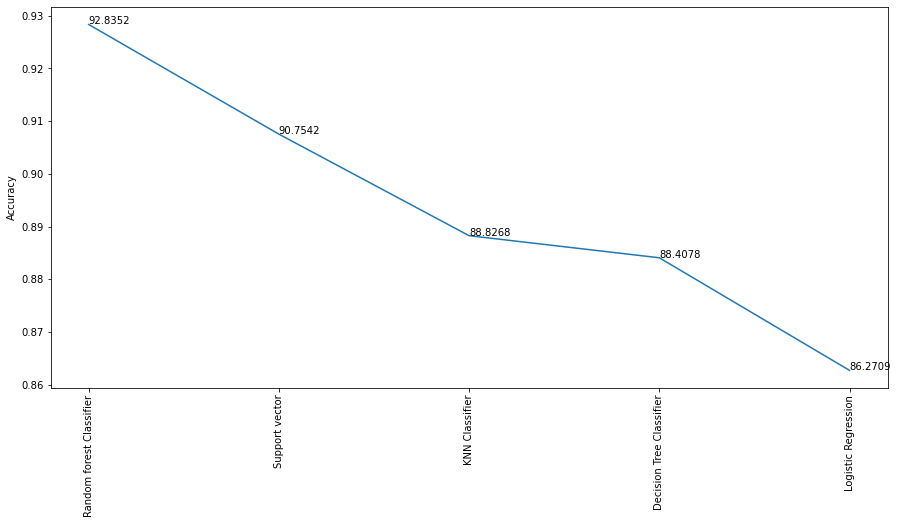

In [87]:
plt.figure(figsize=(15,7))

ax=sns.lineplot(x=algo_accuracy.index,y='Accuracy',data=algo_accuracy)
plt.xticks(rotation=90)

for i,acc in enumerate(algo_accuracy["Accuracy"]):
    plt.annotate(round(acc*100,4),(algo_accuracy.index[i],algo_accuracy["Accuracy"][i]))
    
plt.show()